<span style="color:red">Assignment Grade: 4.5</span>

  Q 1: 5.0

  Q 2: 0.0

  Q 3: 8.5

  Assignment grade is average of question grades. 

  Comments from pre-grade: We have found your assignment thanks. Sat. Apr 07 at 10:02:23  

  Q1 comments: Part a) the plot does not show and does not update. It was missing the '%pylab nbagg' command -1. The plot is missing title, axis labels and the asymtote -1. The powerloss is not calculated correctly -1. The paramter $b$ should be set to $1.0$ not $10.0$. Part b) is okay, given that you had the wrong $b$ value. However, part c) does not provide an answer to the question that was asked -2. 

  Q2 comments: Code doesn't work. I'm not sure where you wrote it, but `reload` has been deprecated since Python 3.4 and it doesn't work on either WENDI server. You code still doesn't work when I comment out the unnecessary reload, sys import, and encoding lines. Even if your code did work, it would only make one plot. You copied Ryan's code without removing the pprint statements, and didn't separate the ODE derivation into it's own cell. This means SymPy has to rederive it eveyr time you want to change the plot.

  Q3 comments: Cite your sources. Most of the code is copied from the Internet (I checked). Pearson R coefficient plot incorrect, everything else right.


# Homework Assignment 4

#### Due: Friday April 6th, 11:59pm.

Save your file in **mp248/Assignment.4/Assignment.4.ipynb** on your Bitbucket repository.

Problems 1 and 2 respectively ask you to make plots related to the dynamics of a single pendulum and double pendulum, from *Dynamic.plots.1.ipynb* and *Dynamic.plots.2.ipynb*. 

#### Problem 1:

(a) In *Dynamic.plots.1.ipynb* the single pendulum differential equation had the two system constants, $a \geq 0$ is what we called the *friction constant*, and $b > 0$ is the *mass/gravity constant*.  The differential equation had the form $\theta'' + a \theta' + b \sin \theta = 0$.   The *total energy* of the system is

$$E_{tot} = (\theta')^2 + 2b -2b\cos\theta.$$

For a simulation of the ODE to be accurate, the total energy of the system should dissipate according to the heat loss through friction. Thus we should have equality

$$\frac{dE}{dt} = -2a(\theta')^2$$

We call the right hand side of this equation the *theoretical power loss of the system*. If $E(t_i)$ represents the actual total energy of the system at time $t_i$, then the *actual power loss (change) between frames* $t_i$ and $t_{i+1}$ would be the quantity $\frac{E(t_{i+1})-E(t_i)}{t_{i+1} - t_i} = \frac{\Delta E}{\Delta t}$. 

For the system with $a=0.1$, $b=1$, $\theta_0 = 0$ and $\theta'_0=10$, create a plot with one slider controlling the time step.  In your plot, show $\theta(t)$ as a function of time. In a dynamic text field (in your plot with the slider) present the maximum (absolute value) of the difference between the theoretical $-2a(\theta')^2$ power loss and the actual power loss $\frac{\Delta E}{\Delta t}$ between frames of the animation.  Call this quantity the power-loss-deviation (PLD) of the simulation, i.e. in your plot you should have a dynamic text field "MAX PLD: number". 

Ensure your time interval is long enough so that one can see the pendulum coming to rest (let's define this to be $E_{tot}(t_i) < 0.1$) for $t_i$ at the end of your interval.  

(b) Determine the how small $\Delta t$ needs to be to ensure the maximum PLD is less than *1.0*. 

(c) A properly simulated solution to this differential equation has a horizontal asymptote an integer multiple of $2\pi$.  How small does $\Delta t$ need to be to discover the correct asymptote, and what is the asymptote?

For parts (b) and (c) you should be using the tool you built (i.e. the dynamic plot) in part (a).

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


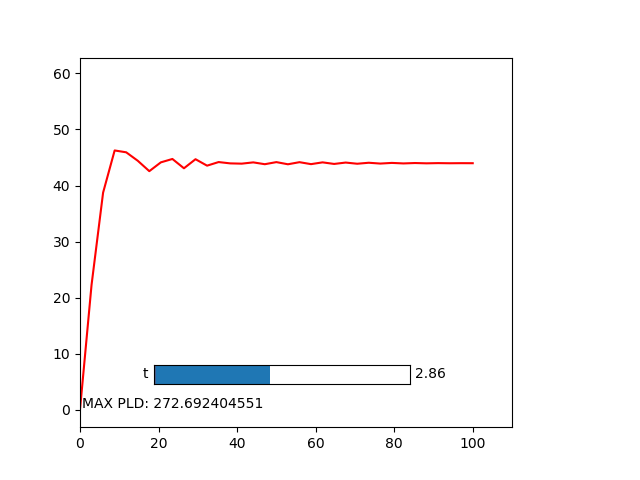

In [1]:
# Marker: I added this to get it working
###
%pylab nbagg
####

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.text import Text
from scipy.integrate import odeint
from matplotlib.widgets import Slider
from scipy.integrate import odeint


fig, ax = plt.subplots()
plt.subplots_adjust(right=0.8)

## variables theta and theta' th and tp.
## theta vs time?  or we could plot theta vs theta'

th = [0.0]
tp = [0.0]
t = [0.0]

T = 100
l, = plt.plot(t, th, 'r')
ax.set_xlim(left=0.0, right=1.1*T)
ax.set_ylim(bottom=-1 * np.pi, top=20 * np.pi)

## let's make that interactive with a slider
## first say location
axt = plt.axes([0.24, 0.2, 0.4, 0.04])
tval = Slider(axt, 't', 0.001, 2 * np.pi, valinit=t[0])

initial_text = '0'
t1 = ax.text(0.5, 0.3, 'MAX PLD: ')
#axth = plt.axes([0.84, 0.8, 0.1, 0.04])
#tPLD = Text(axth, 'MAX PLD: number', initial=initial_text)

a = 0.1
b = 10

E_prev = 0;

def update(val):
    th = [0.0]
    tp = [10.0]
    ## simulate solution, put into th and tp and t.
    t = np.linspace(0.0, T, T/tval.val)
    SOL = odeint(lambda th, t, a, b: [th[1], -a * th[1] - b * np.sin(th[0])], [th[0], tp[0]], \
                 t, args=(a, b))
    th = [x[0] for x in SOL]
    tp = [x[1] for x in SOL]

    e_tot = lambda t: th[1]**2 + 2*b - 2*b*np.cos(th[0])
    de_dt = lambda t: -2*a*th[1]**2

    dE_dt = de_dt(t)
    E_tot = e_tot(t)

    global E_prev
    dE_dt_tot = (E_tot-E_prev)/tval.val

    diff = abs(dE_dt-dE_dt_tot)

    t1.set_text('MAX PLD: ' + str(diff))

    E_prev = E_tot

    ## update screen
    l.set_xdata(t)
    l.set_ydata(th)
    fig.canvas.draw_idle()


tval.on_changed(update)  ## when the slider changes, what to do.

plt.show()

(b) 0.23, from the plot and using slider it is obsereved that beyound $\Delta t$ 0.23 the PLD is above 1 and hence it should be the upper bound for $\Delta t$

(c) 0.97, at $\Delta t$ 0.97 or beyound it is found that the curve is getter flatter showing a horizontal line along the curve. It should be lower bound for $\Delta t$

#### Problem 2: 

We roughly repeat Problem 1, but for the double pendulum.  For this problem we ask you to extend the code from *Dynamic.plots.2.ipynb*.

(a) Make a plot of $\theta_1$ and $\theta_2$ vs. $t$ for the double pendulum with initial conditions 
$$ \theta_1(0) = \pi \hskip 1cm \theta_2(0) = 0$$
$$ \theta_1'(0) = 0 \hskip 1cm \theta_2'(0) = 10$$
$$m_1 = 1 \hskip 1cm m_2 = 1$$
$$r_1 = 1 \hskip 1cm r_2 = 1$$
$$k_1 = 0.1 \hskip 1cm k_2 = 0.1$$
$$ g = 10$$

Have a slider that controls the number of steps in the numerical integration.   Have your plot run long-enough so that the asymptotic behaviour of $\theta_1$ and $\theta_2$ is apparent, in particular both trend towards integer multiples of $2 \pi$.

(b) How small does $\Delta t$ need to be to see this asymptotic behaviour reliably, and what are the integer multiples for $\theta_1$ and $\theta_2$ respectively? 


                          2                         2                         
             2 ⎛d        ⎞             2 ⎛d        ⎞                          
T = 0.5⋅m₁⋅r₁ ⋅⎜──(θ₁(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(θ₁(t))⎟  + m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ
               ⎝dt       ⎠               ⎝dt       ⎠                          

                                                  2
      d         d                    2 ⎛d        ⎞ 
₂(t))⋅──(θ₁(t))⋅──(θ₂(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(θ₂(t))⎟ 
      dt        dt                     ⎝dt       ⎠ 
V = -g⋅m₁⋅r₁⋅cos(θ₁(t)) - g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t)))
Lagrangian
                                                                              
                                                                         2 ⎛d 
L = g⋅m₁⋅r₁⋅cos(θ₁(t)) + g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t))) + 0.5⋅m₁⋅r₁ ⋅⎜──
                                                                           ⎝dt

        2                         2                                           
     

<IPython.core.display.Javascript object>


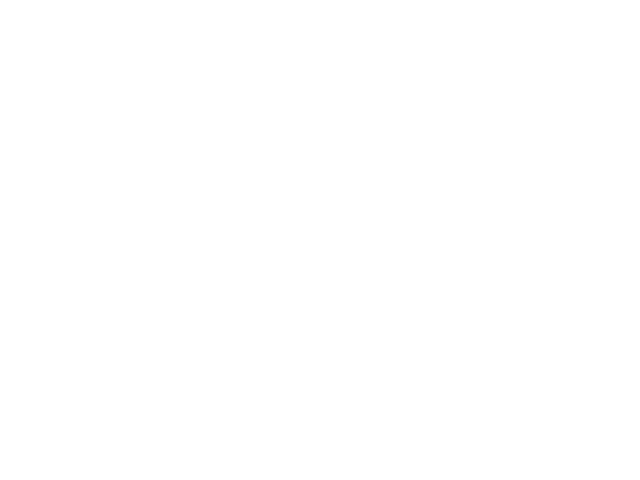

TypeError: can't convert expression to float

In [4]:
# coding: utf-8
#import sys
#reload(sys)
#sys.setdefaultencoding('utf-8')
import sympy as sp

m1, m2, k1, k2, r1, r2, g, t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")
## theta_i we give symbol ti
t1 = sp.Function("θ_1")(t)
t2 = sp.Function("θ_2")(t)
w1 = sp.Derivative(t1, t)
w2 = sp.Derivative(t2, t)

ti = sp.Function("θ_i")(t)
wi = sp.Derivative(ti, t)

R = sp.Function("R")
L = sp.Function("L")

T, V = sp.symbols("T V")

Teq = sp.Eq(T, (1/2)*m1*r1**2*w1**2 + \
            m2*r1*r2*w1*w2*sp.cos(t1-t2)+ \
            (1/2)*m2*r1**2*w1**2+ \
            (1/2)*m2*r2**2*w2**2)
## we forgot the 3rd term in class!
sp.pprint(Teq)

Veq = sp.Eq(V, -m1*g*r1*sp.cos(t1) - \
            m2*g*(r1*sp.cos(t1)+r2*sp.cos(t2)))
sp.pprint(Veq)

Leq = sp.Eq(L, Teq.args[1] - Veq.args[1])
print("Lagrangian")
sp.pprint(Leq)

Req = sp.Eq(R, (1/2)*k1*w1**2 + (1/2)*k2*(w2-w1)**2)
sp.pprint(Req)

## i = 1
LEM1 = (-sp.Derivative(Leq.args[1], t1) +\
        sp.Derivative(Req.args[1], w1) + sp.Derivative(Leq.args[1], w1, t)).doit().simplify()
LEM2 = (-sp.Derivative(Leq.args[1], t2) +\
        sp.Derivative(Req.args[1], w2) + sp.Derivative(Leq.args[1], w2, t)).doit().simplify()

sp.pprint(LEM1)


## solve for theta_1'' and theta_2''
SOL = sp.solve((LEM1, LEM2), sp.Derivative(t1, t, 2), sp.Derivative(t2, t, 2))
sp.pprint(SOL)

T1pp = SOL[sp.Derivative(t1,t,2)].simplify()
T2pp = SOL[sp.Derivative(t2,t,2)].simplify()

test=sp.Derivative(Teq.args[1]+Veq.args[1], t).doit().simplify()
test=test.xreplace({sp.Derivative(t1,t,2): T1pp, sp.Derivative(t2,t,2): T2pp})
test = test.simplify()
sp.pprint( (test + 2*Req.args[1]).simplify())



## We want to make this into a callable function of theta_1, theta_2, theta_1', theta_2'
## and we want it to be reasonably fast.

## technique 1: subst and evalf() very slow
## technique 2: lambdify in sympy
## technique 3 (new): is called ufuncify  -- we will use this.

## first step is to replace all occurences of theta_1(t) as fcn of time with dummy variable
## similarly replace theta_1'(t) with dummy variable

w1, w2, t1, t2 = sp.symbols("w_1 w_2 t_1 t_2")

xT1pp = T1pp
xT1pp = xT1pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})
xT2pp = T2pp
xT2pp = xT2pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})


sp.pprint(xT2pp)


## let's make it callable
## t1pp will be a callable function and you give it arguments
## r1 -- distance from the first bearing to the 2nd -- 1st arm length
## r2 -- distance from 2nd bearing to end of pendulum -- 2nd arm length

from sympy.utilities.autowrap import ufuncify
t1pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT1pp)
t2pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT2pp)

## TH = (theta1, theta2, theta1', theta2')

def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    return [TH[2], TH[3], \
            t1pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g), \
            t2pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g)]

X = theODE([1.0, 1.0, 0.0, 0.0], 0.0, 1.0, 1.0, 1.0, 1.0, 0.1, 0.1, 10.0)
print(X)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(right=0.8)

th = [0.0]
T = 100
l, = plt.plot(t, th, 'r')
ax.set_xlim(left=0.0, right=1.1*T)
ax.set_ylim(bottom=-1 * np.pi, top=20 * np.pi)

axt = plt.axes([0.24, 0.2, 0.4, 0.04])
tval = Slider(axt, 't', 0.001, 2 * np.pi, valinit=t[0])

m1 = 1
m2 = 1

r1 = 1
r2 = 1
k1 = 0.1
k2 = 0.1
g = 10

def update(val):
    th = [np.pi, 0, 0, 10]
    ## simulate solution, put into th and tp and t.
    t = np.linspace(0.0, T, T/tval.val)
    SOL = theODE(th, t, r1, r2, m1, m2, k1, k2, g)
    th = [x[0] for x in SOL]

    ## update screen
    l.set_xdata(t)
    l.set_ydata(th)
    fig.canvas.draw_idle()


tval.on_changed(update)  ## when the slider changes, what to do.

plt.show()

$\theta_1$ trends to $0\pi$ and $\theta_2$ trends to $2\pi$, provided $\Delta t < 40/3000$. 

#### Problem 3: 

We want to analyze and model the wave data from Lab 3 in Part I in more detail. Read the data as you did in Lab 3. The data has now changed because we are at a different date. Recall that each row contains a number of quantaties for each hour of each day over the past three weeks. Here we are interested in the distrubution of wind speeds and if and how they correlate with wave heights.

**3.1**

Read the data and make a histogram of the wind speed using $n = 10$ bins. Print a formatted statement specifying the mean of the wind speed distribution.

In [2]:
%%bash
wget http://www.ndbc.noaa.gov/data/realtime2/46206.txt
mv 46206.txt data.txt

# Doug R. added this

--2018-04-12 17:10:42--  http://www.ndbc.noaa.gov/data/realtime2/46206.txt
Resolving www.ndbc.noaa.gov (www.ndbc.noaa.gov)... 140.90.238.27
Connecting to www.ndbc.noaa.gov (www.ndbc.noaa.gov)|140.90.238.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102084 (100K) [text/plain]
Saving to: '46206.txt'

     0K .......... .......... .......... .......... .......... 50% 58.7K 1s
    50K .......... .......... .......... .......... ......... 100%  117K=1.3s

2018-04-12 17:10:43 (78.0 KB/s) - '46206.txt' saved [102084/102084]



(1084, 19)


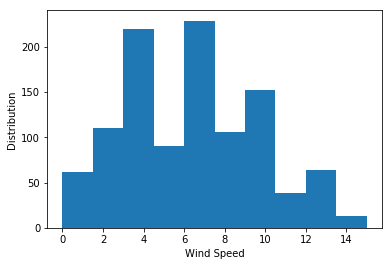

Mean of the wind speed distribution is 6.14944649446


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

col_names = ['YY', 'MM', 'DD', 'hh', 'mm',
             'WDIR', 'WSPD', 'GST',  'WVHT', 'DPD',   'APD', 'MWD',
             'PRES',  'ATMP',  'WTMP',  'DEWP', 'VIS', 'PTDY',  'TIDE']

df = pd.read_table('data.txt', skiprows=2, header=None, delimiter='\s+')

print(df.shape)
df.columns = col_names

plt.hist(df['WSPD'], bins=10)
plt.ylabel('Distribution');
plt.xlabel('Wind Speed');
plt.show()


print('Mean of the wind speed distribution is {}'.format(str(np.mean(df['WSPD']))))

**3.2**

Normalize the data so that the integral of the histogram is unity. Fit the normalized wind speed distribution with a the probability density function of a standard normal distribution. Plot the normalized data and the probability density function.

(1084, 19)


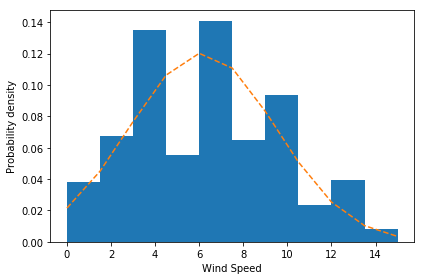

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

col_names = ['YY', 'MM', 'DD', 'hh', 'mm',
             'WDIR', 'WSPD', 'GST',  'WVHT', 'DPD',   'APD', 'MWD',
             'PRES',  'ATMP',  'WTMP',  'DEWP', 'VIS', 'PTDY',  'TIDE']

df = pd.read_table('data.txt', skiprows=2, header=None, delimiter='\s+')

print(df.shape)
df.columns = col_names

num_bins = 10

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(df['WSPD'], num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, np.mean(df['WSPD']), np.std(df['WSPD']))
ax.plot(bins, y, '--')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Probability density')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


**3.3**

Plot the wave height vs. wind speed. Using your own Pearson's r coefficient function determine that coefficient for the data sets wind speed and waveheight. A simply model may predict that once the wind starts increasing it may take a while for the wave height to follow. Modify your plot of wave height vs. wind speed so that it can apply an `hour_offset` so that you plot the wave height at `t + hour_offset` vs. windspeed at time `t` (remember that in the data file the latest measurements are in the top row and following rows go backward in time). 

(1084, 19)


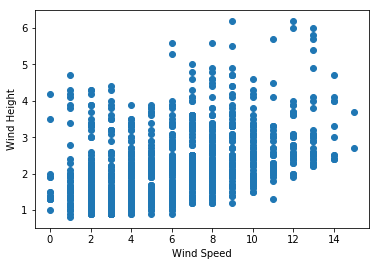

0.390967179085


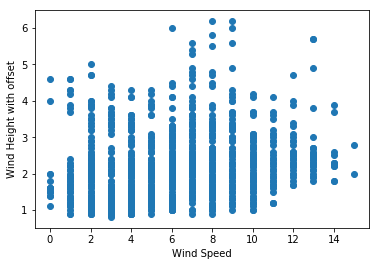

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab


col_names = ['YY', 'MM', 'DD', 'hh', 'mm',
             'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD',
             'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'PTDY', 'TIDE']

df = pd.read_table('data.txt', skiprows=2, header=None, delimiter='\s+')

print(df.shape)
df.columns = col_names

plt.scatter(df['WSPD'], df['WVHT'])
plt.ylabel('Wind Height');
plt.xlabel('Wind Speed');

plt.show()


def pearson(x, y):
    n = len(x)
    vals = range(n)

    mean_xi = np.mean(x)
    mean_yi = np.mean(y)

    num = sum([(float(x[i]) - mean_xi)*(float(y[i]) - mean_yi) for i in vals])

    sum_x = np.sqrt(sum([(float(x[i]) - mean_xi)**2 for i in vals]))
    sum_y = np.sqrt(sum([(float(y[i]) - mean_yi) ** 2 for i in vals]))

    r = num / (sum_x*sum_y)

    return r


print(pearson(df['WSPD'], df['WVHT']))


offset = 5

WVH_offset = df.WVHT.shift(-offset)

plt.scatter(df['WSPD'], WVH_offset)
plt.ylabel('Wind Height with offset');
plt.xlabel('Wind Speed');
plt.show()

**3.4**

Determine Pearson's r coefficient for `hour_offset` in the range `[0,10]`. Plot Pearson's r coefficient against `hour_offset`. Overplot a least-square fit of a $4^{th}$ order polynomial. Print a formatted sentence that states the value of the `hour_offset` for the maximum correlation between wave height vs. wind speed. (Do not read off the maximum, but use a an expression that will alway print the right off set no matter what the data set is. Remember it changes every day!).

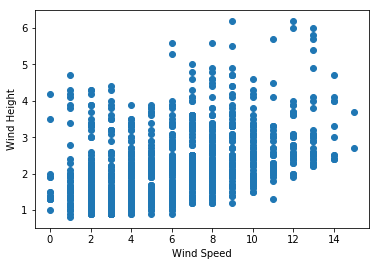

Maximum pearson coefficient is 0.390967179085


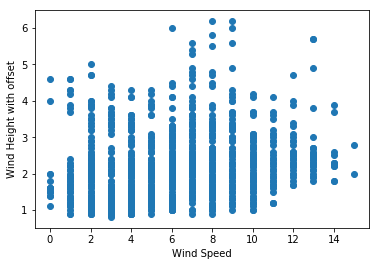

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


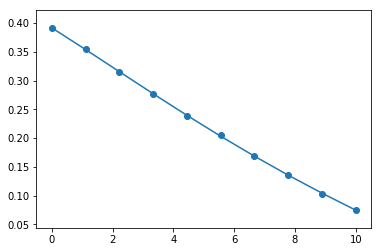

Maximum pearson coefficient is 0.390967179085


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

col_names = ['YY', 'MM', 'DD', 'hh', 'mm',
             'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD',
             'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'PTDY', 'TIDE']

df = pd.read_table('data.txt', skiprows=2, header=None, delimiter='\s+')

df.columns = col_names

plt.scatter(df['WSPD'], df['WVHT'])
plt.ylabel('Wind Height');
plt.xlabel('Wind Speed');

plt.show()


def pearson(x, y):
    n = len(x)
    vals = range(n)

    mean_xi = np.mean(x)
    mean_yi = np.mean(y)

    num = sum([(float(x[i]) - mean_xi)*(float(y[i]) - mean_yi) for i in vals])

    sum_x = np.sqrt(sum([(float(x[i]) - mean_xi)**2 for i in vals]))
    sum_y = np.sqrt(sum([(float(y[i]) - mean_yi) ** 2 for i in vals]))

    r = num / (sum_x*sum_y)

    return r


print('Maximum pearson coefficient is {}'.format(str(pearson(df['WSPD'], df['WVHT']))))

offset = 5
WVH_offset = df.WVHT.shift(-offset)
plt.scatter(df['WSPD'], WVH_offset)
plt.ylabel('Wind Height with offset');
plt.xlabel('Wind Speed');
plt.show()

coeff = []
for i in range(0,10):
    WVH_offset = df.WVHT.shift(-i)
    WVH_offset[np.isnan(WVH_offset)] = 0
    r = pearson(df['WSPD'], WVH_offset)
    coeff.append(r)
plt.scatter(np.linspace(0, 10, 10), coeff)


def model_func(x,a,b,c):
    return a*x**3+b*x**2+c

x = np.linspace(0, 10, 10)
#fitpars, covmat = curve_fit(model_func, np.linspace(0, 10, 10), coeff, p0=[1.5,-1.5,0.1])
z = np.polyfit(x, coeff, 4)
p4 = np.poly1d(z)
plt.plot(x, p4(x))

plt.show()

print('Maximum pearson coefficient is {}'.format(str(np.max(coeff))))

